# Data set - book

# Objective:We want to create association rule for books

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load the data set

In [2]:
book = pd.read_csv('E:\\Study\\ASSIGNMENTS\\Association rules\\book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# Understand the data set

In [3]:
book.shape

(2000, 11)

In [4]:
book.size

22000

# Checking of null values in side the data set

In [6]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


# Visualize book frequency inside the data set

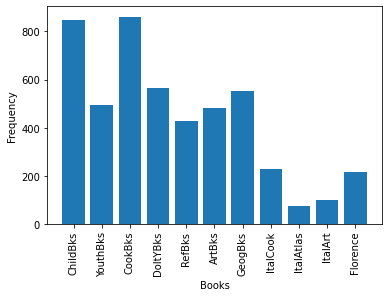

In [7]:
plt.bar (book.columns ,book.sum(axis=0))
plt.xticks(rotation = 90)
plt.xlabel("Books")
plt.ylabel("Frequency")
plt.show()

# Model Processing

Model1

In [8]:
 #Perform Association rule
book_sales1 = apriori(book, min_support=0.1, use_colnames=True)
book_sales1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [9]:
rules1 = association_rules(book_sales1, metric="lift", min_threshold=0.8)
rules1


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [10]:
rules1.sort_values('lift',ascending = False,inplace=True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


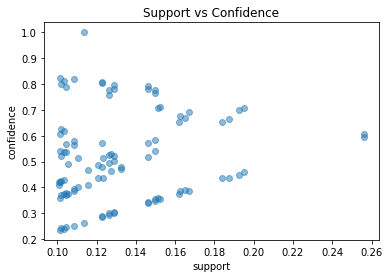

In [11]:
plt.scatter(rules1['support'], rules1['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

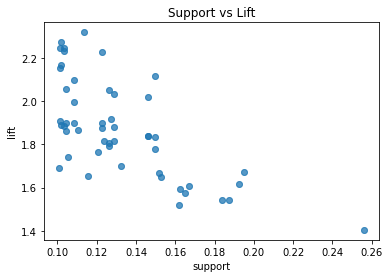

In [12]:
plt.scatter(rules1["support"], rules1["lift"], alpha=0.5)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
plt.show()

# Association Rule for ChildBks

In [13]:
bookname='ChildBks'
rules1_ChildBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ChildBks,["antecedents","consequents"]]

,antecedents,consequents
78,"(ArtBks, ChildBks)",(GeogBks)
53,"(CookBks, ChildBks)",(RefBks)
77,"(GeogBks, ChildBks)",(ArtBks)
66,"(CookBks, ChildBks)",(GeogBks)
71,"(DoItYBks, ChildBks)",(GeogBks)
59,"(CookBks, ChildBks)",(ArtBks)
42,"(CookBks, ChildBks)",(YouthBks)
48,"(CookBks, ChildBks)",(DoItYBks)
72,"(GeogBks, ChildBks)",(DoItYBks)
57,(ChildBks),"(CookBks, RefBks)"


# Association Rule for YouthBks

In [14]:
bookname='YouthBks'
rules1_YouthBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_YouthBks,["antecedents","consequents"]]

,antecedents,consequents
43,(YouthBks),"(CookBks, ChildBks)"
40,"(YouthBks, CookBks)",(ChildBks)
41,"(YouthBks, ChildBks)",(CookBks)
18,(YouthBks),(GeogBks)
16,(YouthBks),(ArtBks)
14,(YouthBks),(DoItYBks)
0,(YouthBks),(ChildBks)
12,(YouthBks),(CookBks)


# Association Rule for CookBks

In [15]:
bookname='CookBks'
rules1_CookBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_CookBks,["antecedents","consequents"]]

,antecedents,consequents
28,(CookBks),(ItalCook)
82,"(DoItYBks, CookBks)",(ArtBks)
94,"(CookBks, ArtBks)",(GeogBks)
95,"(CookBks, GeogBks)",(ArtBks)
53,"(CookBks, ChildBks)",(RefBks)
84,"(CookBks, ArtBks)",(DoItYBks)
66,"(CookBks, ChildBks)",(GeogBks)
88,"(DoItYBks, CookBks)",(GeogBks)
59,"(CookBks, ChildBks)",(ArtBks)
42,"(CookBks, ChildBks)",(YouthBks)


# Association Rule for DoItYBks

In [16]:
bookname='DoItYBks'
rules1_DoItYBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_DoItYBks,["antecedents","consequents"]]

,antecedents,consequents
82,"(DoItYBks, CookBks)",(ArtBks)
85,(DoItYBks),"(CookBks, ArtBks)"
88,"(DoItYBks, CookBks)",(GeogBks)
71,"(DoItYBks, ChildBks)",(GeogBks)
49,(DoItYBks),"(CookBks, ChildBks)"
91,(DoItYBks),"(CookBks, GeogBks)"
83,"(DoItYBks, ArtBks)",(CookBks)
73,(DoItYBks),"(GeogBks, ChildBks)"
89,"(DoItYBks, GeogBks)",(CookBks)
70,"(DoItYBks, GeogBks)",(ChildBks)


# Association Rule for RefBks

In [17]:
bookname='RefBks'
rules1_RefBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_RefBks,["antecedents","consequents"]]

,antecedents,consequents
56,(RefBks),"(CookBks, ChildBks)"
52,"(CookBks, RefBks)",(ChildBks)
54,"(RefBks, ChildBks)",(CookBks)
37,(RefBks),(GeogBks)
31,(RefBks),(DoItYBks)
6,(RefBks),(ChildBks)
23,(RefBks),(CookBks)


# Association Rule for ArtBks

In [18]:

bookname='ArtBks'
rules1_ArtBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ArtBks,["antecedents","consequents"]]

,antecedents,consequents
78,"(ArtBks, ChildBks)",(GeogBks)
87,(ArtBks),"(DoItYBks, CookBks)"
94,"(CookBks, ArtBks)",(GeogBks)
98,(ArtBks),"(CookBks, GeogBks)"
80,(ArtBks),"(GeogBks, ChildBks)"
84,"(CookBks, ArtBks)",(DoItYBks)
62,(ArtBks),"(CookBks, ChildBks)"
39,(ArtBks),(GeogBks)
83,"(DoItYBks, ArtBks)",(CookBks)
76,"(GeogBks, ArtBks)",(ChildBks)


# Association Rule for GeogBks

In [19]:
bookname='GeogBks'
rules1_GeogBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_GeogBks,["antecedents","consequents"]]

,antecedents,consequents
79,(GeogBks),"(ArtBks, ChildBks)"
99,(GeogBks),"(CookBks, ArtBks)"
95,"(CookBks, GeogBks)",(ArtBks)
77,"(GeogBks, ChildBks)",(ArtBks)
67,(GeogBks),"(CookBks, ChildBks)"
93,(GeogBks),"(DoItYBks, CookBks)"
74,(GeogBks),"(DoItYBks, ChildBks)"
90,"(CookBks, GeogBks)",(DoItYBks)
38,(GeogBks),(ArtBks)
72,"(GeogBks, ChildBks)",(DoItYBks)


# Association Rule for ItalCook

In [20]:
bookname='ItalCook'
rules1_ItalCook =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ItalCook,["antecedents","consequents"]]

,antecedents,consequents
29,(ItalCook),(CookBks)


# Association Rule for ItalAtlas

In [21]:
bookname='ItalAtlas'
rules1_ItalAtlas =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ItalAtlas,["antecedents","consequents"]]

,antecedents,consequents


# Association Rule for ItalArt

In [22]:
bookname='ItalArt'
rules1_ItalArt =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ItalArt,["antecedents","consequents"]]

,antecedents,consequents


# Association Rule for Florence

In [23]:
bookname='Florence'
rules1_Florence =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_Florence,["antecedents","consequents"]]

,antecedents,consequents


# Model2

# We will crate other rules by taking different length in Apriori

In [24]:
# Perform Association rule
book_sales2 = apriori(book, min_support=0.15, use_colnames=True)
book_sales2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(DoItYBks, ChildBks)"


In [25]:
rules2 = association_rules(book_sales2, metric="lift", min_threshold=0.8)
rules2rules2 = association_rules(book_sales2, metric="lift", min_threshold=0.8)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


In [26]:
rules2.sort_values('lift',ascending = False,inplace=True)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
10,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
17,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
16,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621
20,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
21,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
18,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125
19,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095


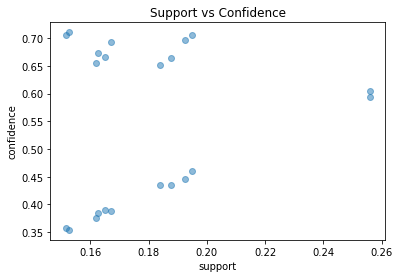

In [27]:
plt.scatter(rules2['support'], rules2['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

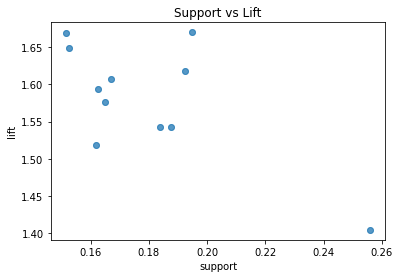

In [28]:
plt.scatter(rules2["support"], rules2["lift"], alpha=0.5)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
plt.show()

# Model3

# We will crate other rules by taking different length in Apriori

In [29]:
# Perform Association rule
book_sales3 = apriori(book, min_support=0.05, use_colnames=True)
book_sales3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(YouthBks, DoItYBks, CookBks, GeogBks)"
96,0.0560,"(YouthBks, CookBks, ArtBks, GeogBks)"
97,0.0650,"(DoItYBks, CookBks, ArtBks, GeogBks)"
98,0.0510,"(YouthBks, DoItYBks, ChildBks, CookBks, GeogBks)"


In [30]:
rules3 = association_rules(book_sales3, metric="lift", min_threshold=0.8)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(DoItYBks),"(GeogBks, CookBks, ArtBks, ChildBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085
658,(ChildBks),"(DoItYBks, CookBks, ArtBks, GeogBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379
659,(CookBks),"(DoItYBks, GeogBks, ArtBks, ChildBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
660,(ArtBks),"(GeogBks, DoItYBks, CookBks, ChildBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939


In [31]:
rules3.sort_values('lift',ascending = False,inplace=True)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
185,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
180,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
513,"(ItalCook, ChildBks)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923
508,"(GeogBks, CookBks)","(ItalCook, ChildBks)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125
512,"(CookBks, ChildBks)","(GeogBks, ItalCook)",0.2560,0.0640,0.0525,0.205078,3.204346,0.036116,1.177474
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
14,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
15,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


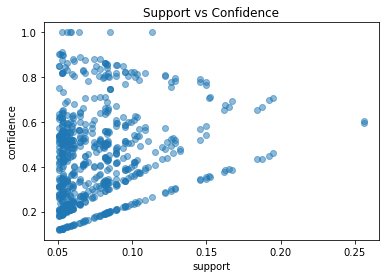

In [32]:
plt.scatter(rules3['support'], rules3['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

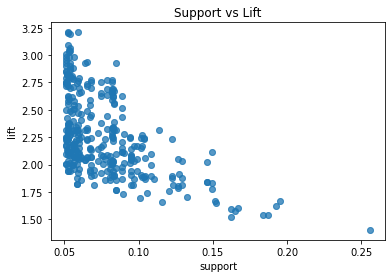

In [33]:
plt.scatter(rules3["support"], rules3["lift"], alpha=0.5)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
plt.show()
